In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('airflow/data/final_data.csv')

C:\Users\ETUDIANT\AppData\Local\Temp\ipykernel_10628\3650570228.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap (df.corr(), annot = True,linewidths =0.75,linecolor = "White",fmt = ".2f",center = -0.1)


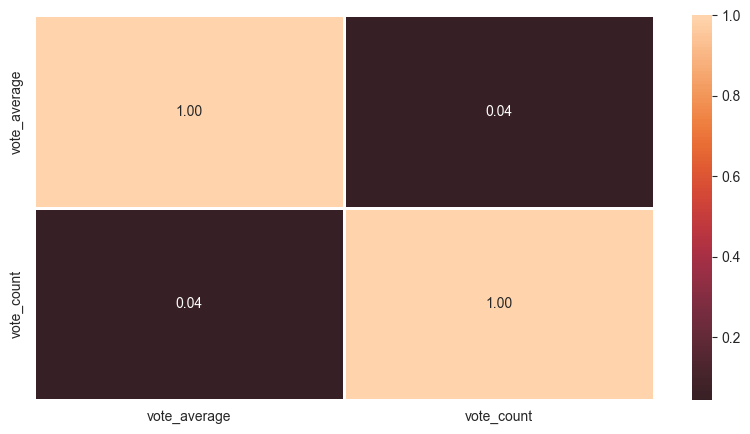

In [4]:
#visualization using heatmap
plt.subplots(figsize = (10,5))
sns.heatmap (df.corr(), annot = True,linewidths =0.75,linecolor = "White",fmt = ".2f",center = -0.1)
plt.show()

In [5]:
from collections import Counter
genre_count_dict=Counter(df["genre"])

In [6]:
newDict={}
for (key, value) in genre_count_dict.items():
    # Check if key is even then add pair to new dictionary
    if value >= 50 :
        newDict[key] = value

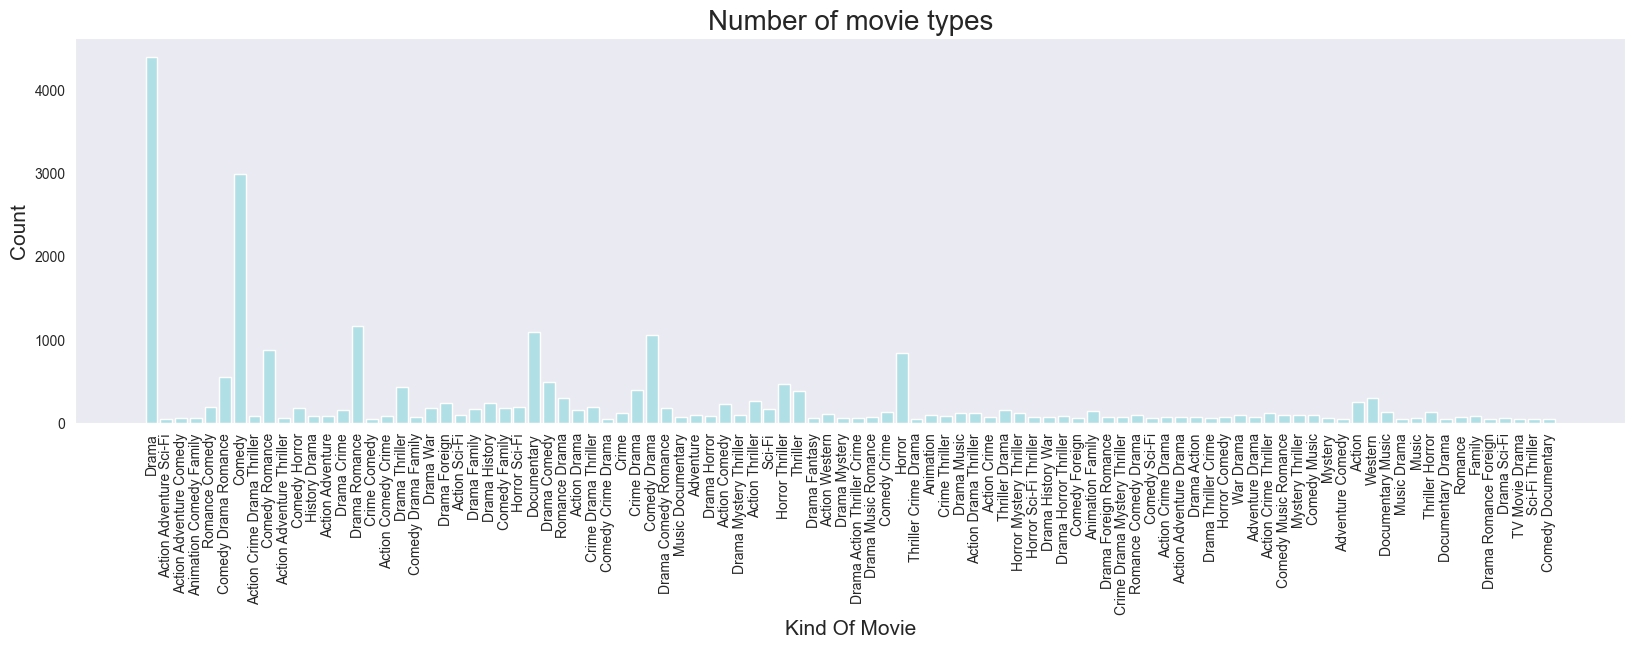

In [7]:
genre_name = []
genre_count = []
for genre in newDict:
    genre_name.append(genre)  #putting genres into array
    genre_count.append(newDict[genre])  #putting the frequency into array
#visualization using bar graph
plt.figure(figsize=(20, 5))
plt.bar(genre_name, genre_count, color='powderblue')
plt.xticks(rotation=90)
plt.xlabel("Kind Of Movie", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Number of movie types", fontsize=20)
plt.grid()
plt.show()

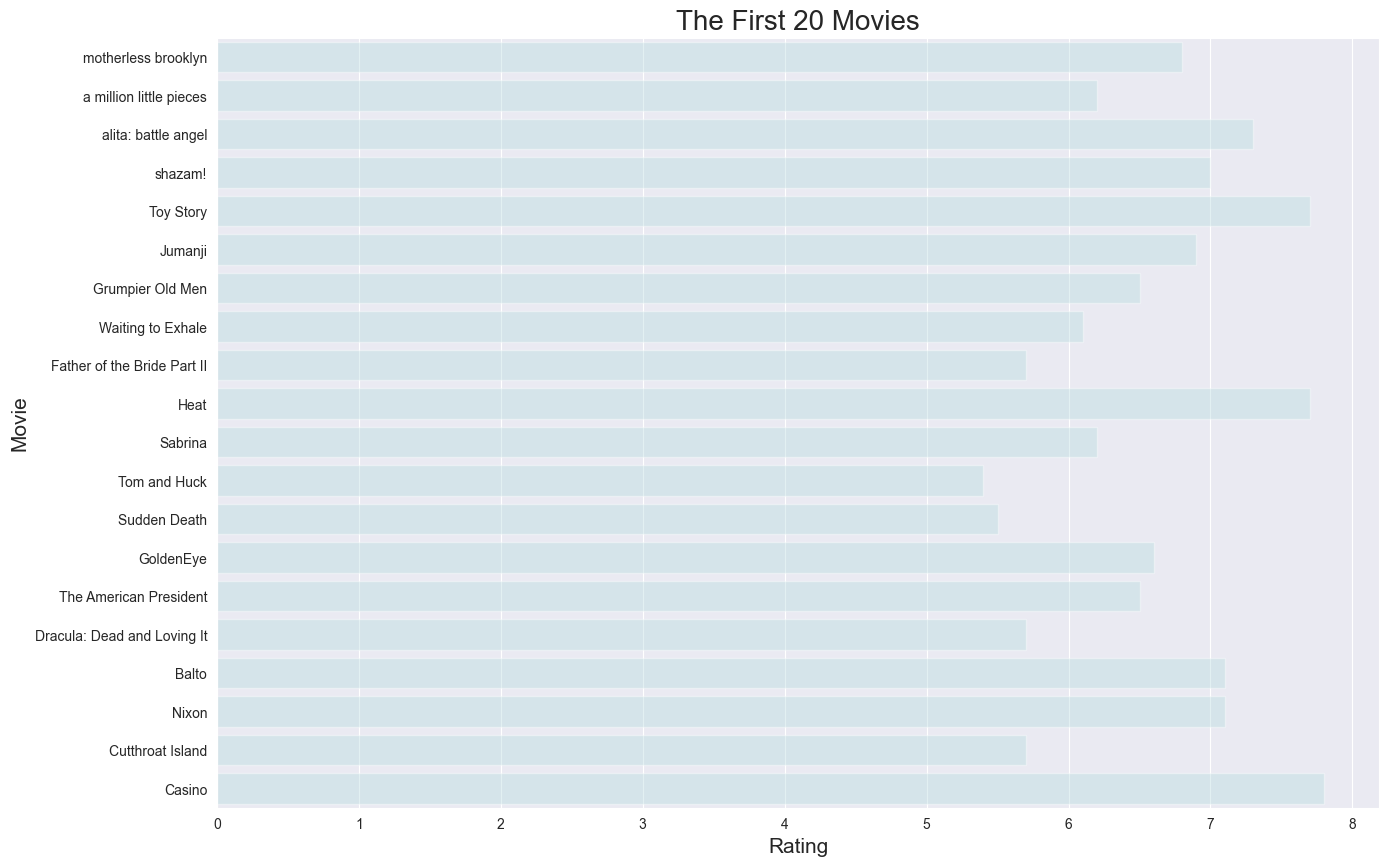

In [8]:
#visualization with barplot
plt.figure(figsize = (15,10))
sns.barplot(x = "vote_average",y= "title", data=  df.head(20),color="powderblue",alpha=0.4,label="Vote_average")

plt.xlabel("Rating",fontsize= 15)
plt.ylabel("Movie",fontsize= 15)
plt.title("The First 20 Movies",fontsize = 20)
plt.show()

In [9]:
#visualization of popularity v/s votes through regression plot
df['release_date']=pd.to_datetime(df['release_date'])
df1 = pd.concat([pd.Series(row['release_date'].year, row['genre'].split(' '))
                 for _, row in df[df["release_date"].dt.year>1990][["release_date","genre"]].iterrows()]).reset_index()

In [10]:
df1.columns = ["genres","year"]

In [11]:
df1["genres"] = df1["genres"].apply(lambda x: x.strip())

!pip install wordcloud

In [12]:
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
from bokeh.plotting import figure, output_file, show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker, LogTicker, ContinuousTicker, AdaptiveTicker,
    PrintfTickFormatter,
    ColorBar,
    FactorRange
)
import bokeh.palettes
from bokeh.transform import factor_cmap
from wordcloud import WordCloud, STOPWORDS
from math import floor
from bokeh.io import output_notebook
from bokeh.models import NumeralTickFormatter
from bokeh.resources import CDN
from bokeh.embed import file_html



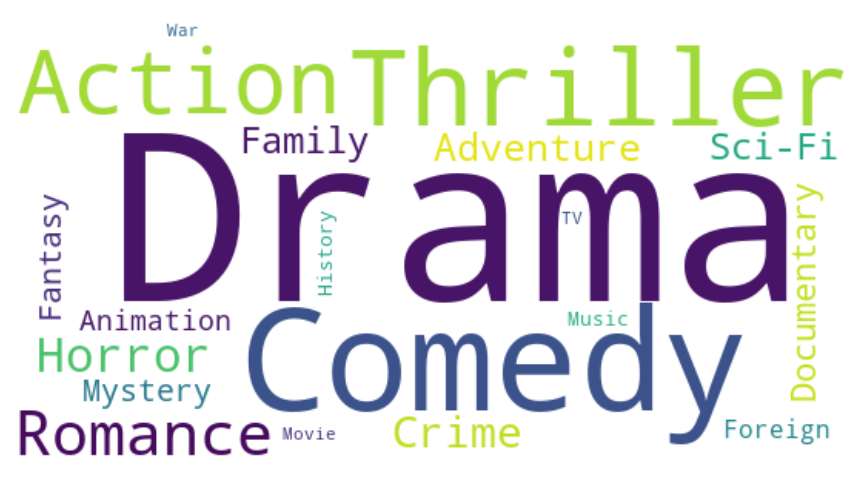

In [13]:
words = dict()
trunc_occurences = df1.groupby(["genres"]).size().sort_values(ascending=False).reset_index()
trunc_occurences.columns = ["genres", "frequency"]
for i in range(20):
    words[trunc_occurences["genres"][i]] = trunc_occurences["frequency"][i]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='white',
                      max_words=1628,relative_scaling=0.7,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

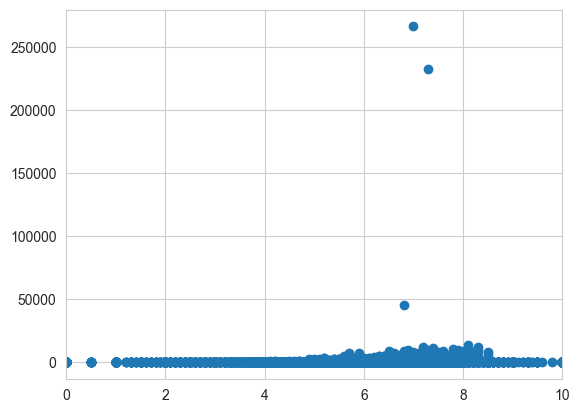

In [15]:
plt.scatter(df["vote_average"],df["vote_count"])
plt.xlim([0,10])
plt.show()

In [ ]:
def extract_decade(x):
    return str(floor(x/10)*10)+"s"

In [ ]:
df["decade"] = df["release_date"].dt.year.apply(extract_decade)

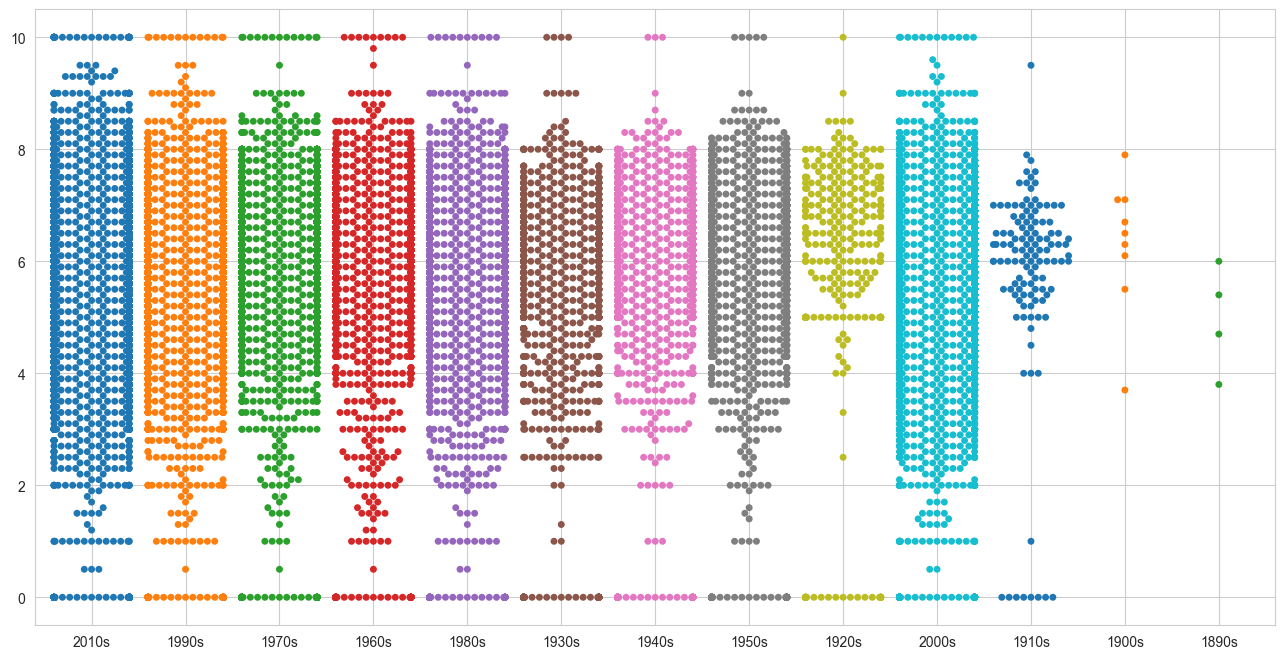

In [ ]:
fig=plt.figure(figsize=(16, 8))
sns.swarmplot(x="decade", y="vote_average", data=df , palette="tab10" )
plt.show()

In [19]:
director_df = df.groupby('director', as_index=False)
director_df = director_df.mean()

In [20]:
director_df

,director,vote_average,vote_count
0,Dale Trevillion\t,2.0,2.00
1,Davide Manuli,6.9,10.00
2,Yeon Sang-Ho,6.6,259.75
3,300ml,0.0,0.00
4,50 Cent,4.7,6.00
...,...,...,...
15458,Федор Дмитриев,10.0,1.00
15459,Ярополк Лапшин,10.0,1.00
15460,پیمان معادی,6.0,2.00
15461,塩谷 直義,7.2,40.00


In [21]:
name_counts = df['director'].value_counts().to_dict()

In [22]:
director_df['film_count'] = director_df['director'].map(name_counts) # match the film count to the director

In [23]:
director_df.sort_values(['vote_average'], ascending=False, inplace=True)

In [24]:
director_df

,director,vote_average,vote_count,film_count
3802,Ebrahim Sheibani,10.0,1.0,1
4126,Erich Weiss,10.0,1.0,1
10781,Nissim Dayan,10.0,1.0,1
1907,Bruno Irizarry,10.0,1.0,1
3244,David Langlitz,10.0,1.0,1
...,...,...,...,...
6234,Jamie Payne,0.0,0.0,1
13529,Stavros Kazantzidis,0.0,0.0,2
6243,Jan Batory,0.0,0.0,1
1589,Bitto Albertini Kuei Chih-Hung,0.0,0.0,1


In [25]:
director_df['director+count'] = director_df['director'].map(str) + " (" + director_df['film_count'].map(str) + ")"

In [26]:
dir_means = director_df[['director+count',  'film_count', 'vote_average']]

In [27]:
dir_subset = director_df[director_df['film_count'] > 5]

In [28]:
top10rat = dir_subset.sort_values(ascending = False, by = 'vote_average')[['director+count','vote_average']].head(10)

!pip install chart-studio

In [30]:
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot
data = [go.Bar(
    x=top10rat['vote_average'],
    y=top10rat['director+count'],
    orientation = 'h',
    marker=dict(
        color='rgb(67,162,202)'
    )
)]

layout = dict(
    title='Average Movie Rating for Directors who have directed more than 5 movies',
    margin=go.Margin(
        l=210,
        r=100,
        b=100,
        t=100,
        pad=1),
    xaxis=dict(
        title='Average Rating'
    ),

    yaxis=dict(
        title='              Director (Number of Movies)',
        tickfont=dict(
            size=12,
        )
    )

)

fig = go.Figure(data = data, layout = layout)

iplot(fig)

C:\Users\ETUDIANT\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\graph_objs\_deprecations.py:405: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [34]:
df = pd.read_csv('airflow/data/final_data.csv')

In [38]:
df_reduced = df[['actor1', 'vote_average',
                 'release_date', 'title']].reset_index(drop = True)

In [39]:
df_reduced

,actor1,vote_average,release_date,title
0,Edward Norton,6.8,2019-01-11,motherless brooklyn
1,Aaron Taylor-Johnson,6.2,2019-06-12,a million little pieces
2,Rosa Salazar,7.3,2019-02-14,alita: battle angel
3,Zachary Levi,7.0,2019-05-04,shazam!
4,Tom Hanks,7.7,1995-10-30,Toy Story
...,...,...,...,...
36379,Rondo Hatton,6.3,1946-03-29,House of Horrors
36380,Tony Abatemarco,7.0,2000-10-22,Shadow of the Blair Witch
36381,Monty Bane,7.0,2000-10-03,The Burkittsville 7
36382,Lisa Boyle,3.5,1995-01-01,Caged Heat 3000


In [36]:
df_appearance = df[['actor1', 'release_date']].groupby('actor1').count().reset_index()

In [37]:
df_appearance

,actor1,release_date
0,Bill Bunten,1
1,Lee Ji-eun,1
2,Ye Ji-won,1
3,"""Weird Al"" Yankovic",1
4,'Crazy' Tim Credeur,1
...,...,...
15697,هستی مهدوی‌فر,1
15698,پیمان معادی,2
15699,杰森·莫玛,2
15700,松田龙平,4


In [40]:
most_prolific = list(df_appearance['actor1'][np.array(df_appearance['release_date'] > 3)])

In [41]:
len(most_prolific)

2038

In [42]:
subset1 = df[df.actor1.isin(most_prolific) &\
            df.actor2.isin(most_prolific) & df.actor3.isin(most_prolific)].reset_index(drop = True)

In [43]:
subset1

,title,genre,director,actor1,actor2,actor3,release_date,vote_average,vote_count
0,Grumpier Old Men,Romance Comedy,Howard Deutch,Walter Matthau,Jack Lemmon,Ann-Margret,1995-12-22,6.5,92.0
1,Father of the Bride Part II,Comedy,Charles Shyer,Steve Martin,Diane Keaton,Martin Short,1995-02-10,5.7,173.0
2,Heat,Action Crime Drama Thriller,Michael Mann,Al Pacino,Robert De Niro,Val Kilmer,1995-12-15,7.7,1886.0
3,Sabrina,Comedy Romance,Sydney Pollack,Harrison Ford,Julia Ormond,Greg Kinnear,1995-12-15,6.2,141.0
4,The American President,Comedy Drama Romance,Rob Reiner,Michael Douglas,Annette Bening,Michael J. Fox,1995-11-17,6.5,199.0
...,...,...,...,...,...,...,...,...,...
3055,Life for Two,Comedy,Clément Duhour,Louis de Funès,Fernandel,Jean Marais,1958-09-24,6.5,1.0
3056,Moving Day,Animation,Ben Sharpsteen,Billy Bletcher,Walt Disney,Pinto Colvig,1936-06-20,5.6,7.0
3057,Tomorrow s Another Day,Comedy,Jeanne Labrune,Nathalie Baye,Isabelle Carré,Jeanne Balibar,2000-11-15,5.5,4.0
3058,Gideon s Daughter,Drama,Stephen Poliakoff,Bill Nighy,Miranda Richardson,Emily Blunt,2005-10-21,6.0,15.0


In [44]:
subset2 = df[df.actor1.isin(most_prolific) |\
            df.actor2.isin(most_prolific) | df.actor3.isin(most_prolific)].reset_index(drop = True)

In [45]:
subset1.shape

(3060, 9)

In [46]:
pair = []
for i in range(subset1.shape[0]):
    pair.append((subset1.loc[i,"actor1"],subset1.loc[i,"actor2"]))
    pair.append((subset1.loc[i,"actor1"],subset1.loc[i,"actor3"]))
    pair.append((subset1.loc[i,"actor2"],subset1.loc[i,"actor3"]))

In [47]:
len(pair), subset1.shape[0]

(9180, 3060)

In [48]:
from collections import *
counter = Counter(tuple(sorted(tup)) for tup in pair)

In [49]:
len(counter)

8506

In [50]:
edges = []
for i in range(len(counter)):
    edges.append((list(counter.keys())[i][0],list(counter.keys())[i][1],list(counter.values())[i]))

In [51]:
!pip install networkx

     ---------------------------------------- 2.0/2.0 MB 2.9 MB/s eta 0:00:00


In [52]:
import networkx as nx
G=nx.Graph()
# G.add_weighted_edges_from(edges)
G.add_edges_from(pair)
# G.add_nodes_from(most_prolific)

In [53]:
print(nx.info(G))

Graph with 1560 nodes and 8506 edges


In [55]:
nodes = list(G.nodes)
d = dict(nx.degree(G))

In [56]:
imp_actors = sorted(d, key=d.get)[201:]

In [57]:
len(d)

1560

In [59]:
!pip install scipy

     ---------------------------------------- 40.2/40.2 MB 2.4 MB/s eta 0:00:00


In [79]:
!pip install plotly==5.0.0

     ---------------------------------------- 19.1/19.1 MB 3.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 2.7.0
    Uninstalling plotly-2.7.0:
      Successfully uninstalled plotly-2.7.0


In [ ]:
pos=nx.kamada_kawai_layout(G)

In [91]:
import plotly as py
from plotly.graph_objs import *


In [92]:
Xv=[pos[k][0] for k in nodes]
Yv=[pos[k][1] for k in nodes]
Xed=[]
Yed=[]
for edge in edges:
    Xed+=[pos[edge[0]][0],pos[edge[1]][0], None]
    Yed+=[pos[edge[0]][1],pos[edge[1]][1], None]

trace3=Scatter(x=Xed,
               y=Yed,
               mode='lines',
               line=Line(color='rgb(210,210,210)', width=1),
               hoverinfo='none'
               )
trace4=Scatter(x=Xv,
               y=Yv,
               mode='markers',
               name='net',
               marker=Marker(symbol='circle-dot',
                             size=10,
                             showscale=True,
                             colorscale = 'Viridis',
                             reversescale = False,

                             colorbar=ColorBar(title='Number of Connections', tickvals=[2,4,6,8,10,12,14,16,18,20,22,24]),

color= list(d.values()),
       line=Line(color='rgb(50,50,50)', width=0.5)
),
text=nodes,
hoverinfo='text'
)



layout=Layout(title= "Leading Actors and their Connections",
font= Font(size=12),
showlegend=False,
xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False),
margin=Margin(
l=40,
r=40,
b=85,
t=100,
),
)

data1=Data([trace3, trace4])
fig1=Figure(data=data1, layout=layout)
iplot(fig1)

C:\Users\ETUDIANT\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


C:\Users\ETUDIANT\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\graph_objs\_deprecations.py:173: DeprecationWarning:

plotly.graph_objs.ColorBar is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.marker.ColorBar
  - plotly.graph_objs.surface.ColorBar
  - etc.


C:\Users\ETUDIANT\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\graph_objs\_deprecations.py:434: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


C: